In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from math import sqrt

In [2]:
ticker = "AMZN"
start = "2018-04-01"
end = "2023-10-05"

In [3]:
df = yf.download(ticker, start=start, end=end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-21,131.940002,132.240005,129.309998,129.330002,129.330002,70234800
2023-09-22,131.110001,132.029999,128.520004,129.119995,129.119995,59904300
2023-09-25,129.360001,131.779999,128.770004,131.270004,131.270004,46017800
2023-09-26,130.119995,130.389999,125.279999,125.980003,125.980003,73048200
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000
2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000


In [4]:
data = df['Close']
# print(data)
print(data.values.shape)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.values.reshape(-1, 1))
# print(data)

(1388,)


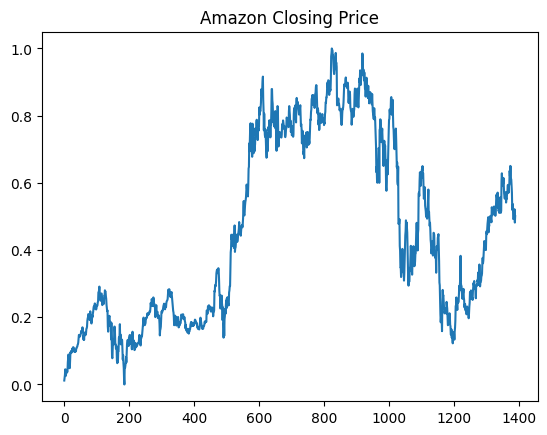

In [5]:
plt.plot(data)
plt.title('Amazon Closing Price')
plt.show()

In [6]:
training_data_len = int(len(data) * 0.8)
# print(training_data_len)
training_data = data[0:training_data_len, :]
testing_data = data[training_data_len:, :]

len(training_data), len(testing_data)

(1110, 278)

In [7]:
past_values = 1

def create_training_data(data, past_values):
    if len(data) < past_values:
        return np.array([]), np.array([])
    X_train = []
    y_train = []
    for i in range(past_values, len(data)):
        X_train.append(data[i-past_values:i, 0])
        y_train.append(data[i, 0])
    return np.array(X_train), np.array(y_train)

X_train, y_train = create_training_data(training_data, past_values)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test_1, y_test = create_training_data(testing_data, past_values)
X_test = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))

In [8]:
X_train.shape

(1109, 1, 1)

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=200, epochs=200, verbose=1)

Epoch 1/200
6/6 [==============================] - 6s 9ms/step - loss: 0.2887
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 0.2319
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 0.1727
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 0.1170
Epoch 5/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0772
Epoch 6/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0692
Epoch 7/200
6/6 [==============================] - 0s 6ms/step - loss: 0.0698
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0588
Epoch 9/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0515
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0427
Epoch 11/200
6/6 [==============================] - 0s 8ms/step - loss: 0.0325
Epoch 12/200
6/6 [==============================] - 0s 7ms/step - loss: 0.0227
Epoch 13/200
6/6 [==============================] - 0s 7ms/st

6/6 [==============================] - 0s 7ms/step - loss: 5.4568e-04
Epoch 101/200
6/6 [==============================] - 0s 8ms/step - loss: 5.4182e-04
Epoch 102/200
6/6 [==============================] - 0s 8ms/step - loss: 5.4133e-04
Epoch 103/200
6/6 [==============================] - 0s 8ms/step - loss: 5.4941e-04
Epoch 104/200
6/6 [==============================] - 0s 7ms/step - loss: 5.4666e-04
Epoch 105/200
6/6 [==============================] - 0s 7ms/step - loss: 5.4477e-04
Epoch 106/200
6/6 [==============================] - 0s 7ms/step - loss: 5.4036e-04
Epoch 107/200
6/6 [==============================] - 0s 7ms/step - loss: 5.3743e-04
Epoch 108/200
6/6 [==============================] - 0s 7ms/step - loss: 5.3616e-04
Epoch 109/200
6/6 [==============================] - 0s 8ms/step - loss: 5.4043e-04
Epoch 110/200
6/6 [==============================] - 0s 8ms/step - loss: 5.4075e-04
Epoch 111/200
6/6 [==============================] - 0s 7ms/step - loss: 5.4000e-04
Epoch 

6/6 [==============================] - 0s 9ms/step - loss: 5.3745e-04
Epoch 198/200
6/6 [==============================] - 0s 10ms/step - loss: 5.2953e-04
Epoch 199/200
6/6 [==============================] - 0s 10ms/step - loss: 5.2986e-04
Epoch 200/200
6/6 [==============================] - 0s 9ms/step - loss: 5.2999e-04


In [10]:
pred_train = model.predict(X_train)
pred = model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


In [11]:
pred_train = scaler.inverse_transform(pred_train)
pred = scaler.inverse_transform(pred)
y_test = scaler.inverse_transform([y_test])
y_train = scaler.inverse_transform([y_train])

In [12]:
y_test = y_test.flatten()
y_train = y_train.flatten()

Training Error
Mean Absolute Error (MAE): 1.9047698768223589
Root Mean Squared Error (RMSE): 2.7537099346568743


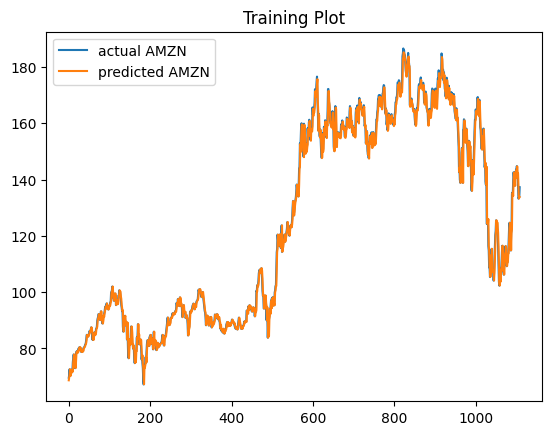

In [13]:
print("Training Error")
mae = mean_absolute_error(y_train, pred_train)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_train, pred_train))
print("Root Mean Squared Error (RMSE):", rmse)
    
plt.plot(y_train, label = 'actual '+str(ticker))
plt.plot(pred_train, label = 'predicted '+str(ticker))
plt.title("Training Plot")
plt.legend()
plt.show()

Testing Error
Mean Absolute Error (MAE): 1.998762605853029
Root Mean Squared Error (RMSE): 2.6769699961102433


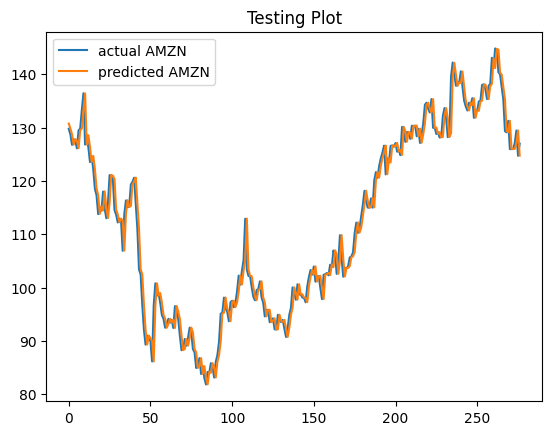

In [14]:
print("Testing Error")
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Root Mean Squared Error (RMSE):", rmse)

plt.plot(y_test, label = 'actual '+str(ticker))
plt.plot(pred, label = 'predicted '+str(ticker))
plt.title("Testing Plot")
plt.legend()
plt.show()

## 10 days future prediction without correction

In [55]:
def predict_future(days, last_input):
    Output = []
#     i = 0
#     while(i<days):
#     print(f'loop runs {i} times')
#         print('before reshape',last_input)
    last_input = last_input.reshape((20, past_values, 1))
#         print('After Reshape',last_input)
    res = model.predict(last_input)
#         last_input = res
    Output.extend(res.tolist())
#         i=i+1
        
#     print(Output)
    Output = scaler.inverse_transform(Output)
#     print(Output)
    return Output
    
future_predictions_1 = predict_future(1, X_test[-20:])
future_predictions_1 = future_predictions_1.flatten()

1/1 [==============================] - 0s 28ms/step


In [56]:
day=range(1,21)

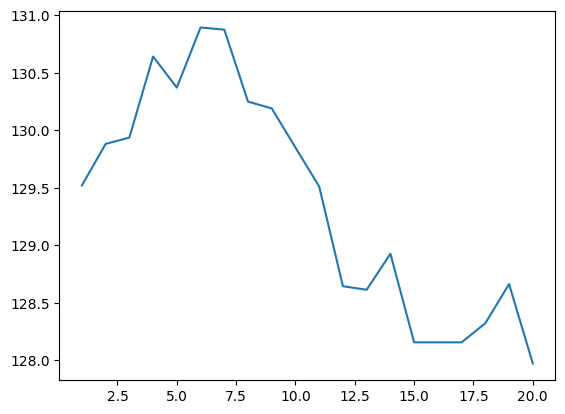

In [57]:
plt.plot(day,future_predictions_1)
plt.show()

In [18]:
# def predict_future(days, last_input):
#     Output = []
#     i = 0
#     while(i<days):
# #         print('before reshape',last_input)
#         last_input = last_input.reshape((60, past_values, 1))
# #         print('After Reshape',last_input)
#         res = model.predict(last_input)
# #         last_input = res
#         Output.extend(res.tolist())
#         i=i+1
        
#     print(Output)
#     Output = scaler.inverse_transform(Output)
#     print(Output)
#     return Output
    
# future_predictions_half = predict_future(1/2, X_test[-60:])
# future_predictions_half = future_predictions.flatten()

In [19]:
# def predict_future(days, last_input):
#     Output = []
#     i = 0
#     while(i<days):
# #         print('before reshape',last_input)
#         last_input = last_input.reshape((60, past_values, 1))
# #         print('After Reshape',last_input)
#         res = model.predict(last_input)
# #         last_input = res
#         Output.extend(res.tolist())
#         i=i+1
        
#     print(Output)
#     Output = scaler.inverse_transform(Output)
#     print(Output)
#     return Output
    
# future_predictions_2 = predict_future(2, X_test[-10:])
# future_predictions_2 = future_predictions.flatten()

# 10 days future predictions with one day correction

In [20]:
df = yf.download('AMZN', start='2023-10-05', end='2023-11-02')
df = df.reset_index(drop=True)
data = df['Close'].values
print(data)
data = scaler.fit_transform(data.reshape(-1, 1))
output_list = []
for d in data:
#     print('Actual Price',d)
    inp = d.reshape((1,1,1))
    pred = model.predict(inp)
#     print('Predicted Price',pred)
    pred1 = scaler.inverse_transform(pred)
    output_list.extend(pred1.tolist())
#     print('Predicted Price after inverse scaler',pred1)

print(output_list)

[*********************100%***********************]  1 of 1 completed
[125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.        ]
1/1 [==============================] - 0s 26ms/step
[[125.96521759033203], [127.96509552001953], [128.26438903808594], [129.47882080078125], [131.80206298828125], [132.29296875], [129.78662109375], [132.50852966308594], [131.4477996826172], [128.13473510742188], [128.4039764404297], [125.17393493652344], [126.56583404541016], [128.56344604492188], [121.3927001953125], [119.58399963378906], [127.74547576904297], [132.66513061523438], [133.03646850585938], [136.80079650878906]]


In [21]:
day = range(1,21)

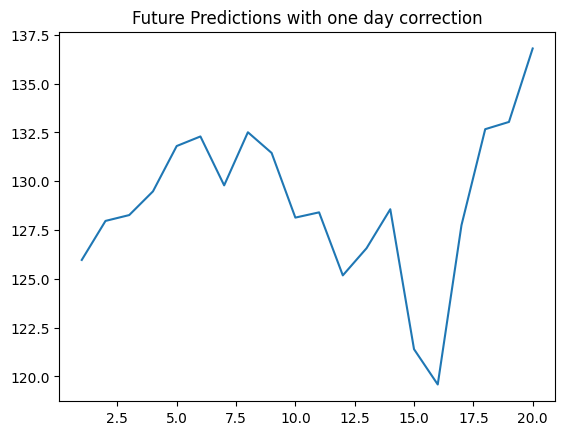

In [22]:
plt.title('Future Predictions with one day correction')
plt.plot(day,output_list)
plt.show()

# 10 days future predictions with two days correction

In [23]:
df = yf.download('AMZN', start='2023-10-05', end='2023-11-02')
# print(df)

data1 = df['Close'].values
# print(data1)

data = scaler.fit_transform(data1.reshape(-1, 1))
print(data)
# print(data[0][0])
# print(data[1][0])
output_list_2 = []
for d in range(len(data+2)):
    try:
        inp = np.array([data[d][0],data[d+1][0]])
        inp1 = inp.reshape((1,2,1))
#         pred = model.predict([inp1,inp2])
        pred = model.predict(inp1)
#         print(pred)
        pred = scaler.inverse_transform(pred)
        output_list_2.extend(pred.tolist())
#         print(output_list_2)
    except:
        print('error')

print(output_list_2)


[*********************100%***********************]  1 of 1 completed
[[0.36660925]
 [0.48135394]
 [0.49856538]
 [0.56855972]
 [0.70338508]
 [0.73207125]
 [0.586345  ]
 [0.74469324]
 [0.682731  ]
 [0.49110758]
 [0.50659748]
 [0.32128505]
 [0.40103257]
 [0.51577726]
 [0.10441765]
 [0.        ]
 [0.46873196]
 [0.75387302]
 [0.77567392]
 [1.        ]]
1/1 [==============================] - 0s 22ms/step
error
[[136.3818817138672], [140.86045837402344], [142.6352996826172], [147.28158569335938], [152.34304809570312], [151.0788116455078], [148.5486602783203], [152.98138427734375], [147.88870239257812], [141.3458251953125], [138.81944274902344], [133.32313537597656], [138.228515625], [135.5041961669922], [118.0127944946289], [122.40397644042969], [144.5917510986328], [154.6832733154297], [158.6405792236328]]


In [28]:
day = range(1,20)

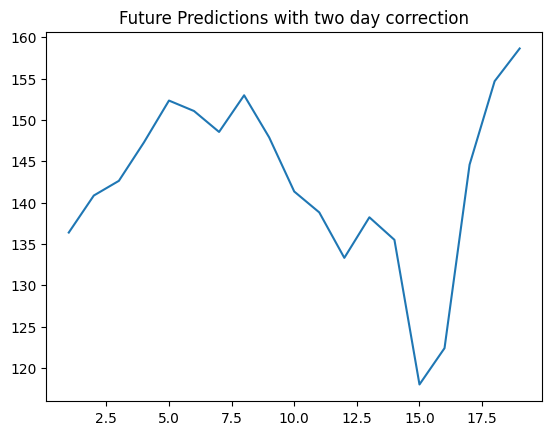

In [29]:
plt.title('Future Predictions with two day correction')
plt.plot(day,output_list_2)
plt.show()

In [30]:
ticker = "AMZN"
start='2023-10-05'
end='2023-11-02'
df = yf.download(ticker, start=start, end=end)
d = df['Close'].values
print(d)

[*********************100%***********************]  1 of 1 completed
[125.95999908 127.95999908 128.25999451 129.47999573 131.83000183
 132.33000183 129.78999329 132.55000305 131.47000122 128.13000488
 128.3999939  125.16999817 126.55999756 128.55999756 121.38999939
 119.56999969 127.73999786 132.71000671 133.08999634 137.        ]


In [31]:
# day_new=np.arange(1,103)
# day_actual = np.arange(101,111)
# day_pred=np.arange(101,111)
# day_2=np.arange(101,110)

In [32]:
day_actual = np.arange(1,21)
day_pred=np.arange(1,21)
day_pred2=np.arange(1,21)
day_2=np.arange(1,20)

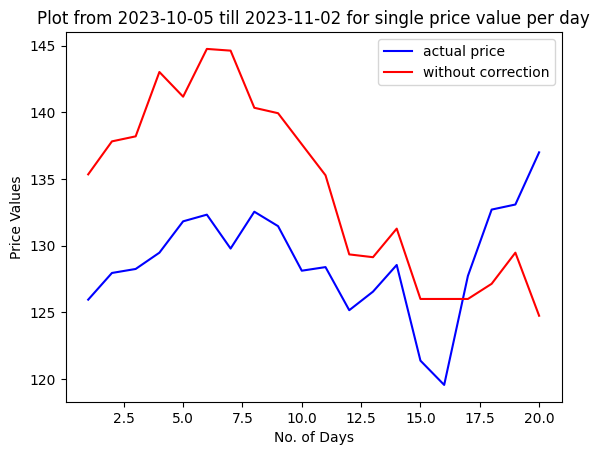

In [44]:
plt.title(f'Plot from {start} till {end} for single price value per day')
plt.xlabel('No. of Days')
plt.ylabel('Price Values')
plt.plot(day_actual,d, label = 'actual price', color='blue')
plt.plot(day_pred,future_predictions_1, label = 'without correction', color='red')
# plt.plot(day_pred2,output_list, label = 'with one day correction', color='green')
# plt.plot(day_2,output_list_2, label = 'with two day correction', color='purple')
plt.legend()
plt.show()

In [34]:
print("Without Correction Data:\n",future_predictions_1,"\n")
print("With One Day Correction:\n",output_list,"\n")
print("With Two Day Correction:\n",output_list_2,"\n")
print("Actual Data:\n",d,"\n")

Without Correction Data:
 [135.35002227 137.82167069 138.19855335 143.02125543 141.17112294
 144.7506295  144.62222229 140.33935417 139.93320687 137.60343464
 135.28048585 129.35147674 129.14226271 131.2832414  126.01197503
 126.01197503 126.01197503 127.14890214 129.48097968 124.75479468] 

With One Day Correction:
 [[125.96521759033203], [127.96509552001953], [128.26438903808594], [129.47882080078125], [131.80206298828125], [132.29296875], [129.78662109375], [132.50852966308594], [131.4477996826172], [128.13473510742188], [128.4039764404297], [125.17393493652344], [126.56583404541016], [128.56344604492188], [121.3927001953125], [119.58399963378906], [127.74547576904297], [132.66513061523438], [133.03646850585938], [136.80079650878906]] 

With Two Day Correction:
 [[136.3818817138672], [140.86045837402344], [142.6352996826172], [147.28158569335938], [152.34304809570312], [151.0788116455078], [148.5486602783203], [152.98138427734375], [147.88870239257812], [141.3458251953125], [138.819